In [1]:
# 📦 1. Gerekli kütüphaneleri yükle
!pip install -q transformers scikit-learn pandas tqdm

# 📂 2. Dosya Yükleme (Colab'te .csv içeri alınacaksa)
from google.colab import files
uploaded = files.upload()


Saving sc.csv to sc.csv


In [10]:
# ⚙️ 3. Model Adını Belirle
#MODEL_NAME = "intfloat/multilingual-e5-large-instruct"
#MODEL_NAME = "ytu-ce-cosmos/turkish-e5-large"
MODEL_NAME = "jinaai/jina-embeddings-v3" # automodel kullanıyor


In [11]:
# 🧠 4. Model Yükleme ve Embedding Fonksiyonları
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np

def load_model_and_tokenizer(model_name, device):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name).to(device)
    model.eval()
    return tokenizer, model

def average_pool(last_hidden_states, attention_mask):
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

def get_embeddings(texts, tokenizer, model, device, batch_size=16):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        batch = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = model(**batch)
            emb = average_pool(outputs.last_hidden_state, batch["attention_mask"])
            all_embeddings.append(emb.cpu().numpy())
    return np.vstack(all_embeddings)


In [12]:
# 📄 5. Veriyi Yükle
import pandas as pd

df = pd.read_csv("sc.csv").dropna()
df.columns = ["question", "gpt4o", "deepseek", "label"]
df["label"] = df["label"].astype(int)
# df = df.iloc[:1000]
df.head()


,question,gpt4o,deepseek,label
0,⦁\tŞu listedekilerin ortak özelliği nedir? Göz...,"Gözlük, kalem ve laptopun tek bir ortak özelli...","Şu listedeki öğelerin ortak özelliği:\nGözlük,...",4
1,"""Adalet"" kavramına benzer, ancak farklı toplum...","""Adalet"" kavramına benzer, ancak farklı toplum...","""Adalet"" gibi evrensel ancak yoruma açık diğer...",3
2,"""ali topu at"" ve ""kemal topu tut"" cümlelerinde...","""Ali topu at"" → 11 harf\n""Kemal topu tut"" → 16...","""Ali topu at"" (3+4+2) + ""Kemal topu tut"" (5+4+...",4
3,"""ali topu at"" ve ""kemal topu tut"" cümlelerinde...","""Ali"", ""top"", ""Kemal"" toplam 3 varlık vardır.","Varlıklar: Ali, top, Kemal → 3 varlık",3
4,"""Çekiç, tornavida, pense"" listesindeki tüm nes...","""Çekiç, tornavida, pense"" listesindeki tüm nes...","Bu nesnelerin ortak işlevi, elle tutularak fiz...",3


In [15]:
from transformers import AutoModel

model = AutoModel.from_pretrained("jinaai/jina-embeddings-v3", trust_remote_code=True)

s_emb = model.encode(df["question"].tolist(), task="text-matching")
g_emb = model.encode(df["gpt4o"].tolist(), task="text-matching")
d_emb = model.encode(df["deepseek"].tolist(), task="text-matching")

In [14]:
# ✨ 6. Embedding Hesapla
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer, model = load_model_and_tokenizer(MODEL_NAME, device)

s_emb = get_embeddings(df["question"].tolist(), tokenizer, model, device)
g_emb = get_embeddings(df["gpt4o"].tolist(), tokenizer, model, device)
d_emb = get_embeddings(df["deepseek"].tolist(), tokenizer, model, device)


The repository for jinaai/jina-embeddings-v3 contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/jinaai/jina-embeddings-v3.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


The repository for jinaai/jina-embeddings-v3 contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/jinaai/jina-embeddings-v3.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- stochastic_depth.py
- mha.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- rotary.py
- mlp.py
- block.py
- xlm_padding.py
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_lora.py
- modeling_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

TypeError: Got unsupported ScalarType BFloat16

In [16]:
# 🤖 7. Özellik Çıkartımı ve Model Eğitimi
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = np.hstack([
    #s_emb,
    #g_emb,
    #d_emb,
    np.abs(s_emb - g_emb),
    np.abs(s_emb - d_emb),
    np.abs(g_emb - d_emb),
    np.abs(np.abs(s_emb - g_emb) - np.abs(s_emb - d_emb))
])

X_train, X_test, y_train, y_test = train_test_split(features, df["label"], test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.17      0.01      0.03       570
           2       0.18      0.01      0.02       617
           3       0.52      0.97      0.68      1434
           4       0.00      0.00      0.00       158

    accuracy                           0.51      2779
   macro avg       0.22      0.25      0.18      2779
weighted avg       0.34      0.51      0.36      2779



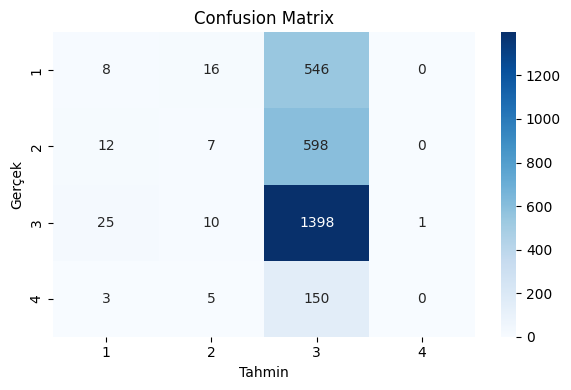

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# 📊 8. Confusion Matrix Görselleştir + Kaydet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Dosya isimlerini modele göre ayarla
model_id = MODEL_NAME.split("/")[-1].replace("-", "_")
report_filename = f"classification_report_{model_id}_4.txt"
fig_filename = f"confusion_matrix_{model_id}_4.png"

# Raporu kaydet
with open(report_filename, "w") as f:
    f.write(classification_report(y_test, y_pred))

# Görselleştir ve kaydet
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4], yticklabels=[1,2,3,4])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig(fig_filename)
plt.show()

# İndir
files.download(report_filename)
files.download(fig_filename)


In [18]:
# 🤖 7. Özellik Çıkartımı ve Model Eğitimi
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = np.hstack([
    s_emb,
    g_emb,
    d_emb
    #np.abs(s_emb - g_emb),
    #np.abs(s_emb - d_emb),
    #np.abs(g_emb - d_emb),
    #np.abs(np.abs(s_emb - g_emb) - np.abs(s_emb - d_emb))
])

X_train, X_test, y_train, y_test = train_test_split(features, df["label"], test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.56      0.01      0.02       570
           2       0.18      0.01      0.02       617
           3       0.52      0.98      0.68      1434
           4       0.00      0.00      0.00       158

    accuracy                           0.51      2779
   macro avg       0.31      0.25      0.18      2779
weighted avg       0.42      0.51      0.36      2779



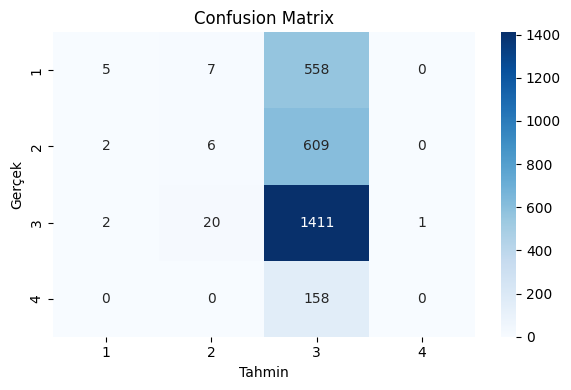

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# 📊 8. Confusion Matrix Görselleştir + Kaydet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Dosya isimlerini modele göre ayarla
model_id = MODEL_NAME.split("/")[-1].replace("-", "_")
report_filename = f"classification_report_{model_id}_3.txt"
fig_filename = f"confusion_matrix_{model_id}_3.png"

# Raporu kaydet
with open(report_filename, "w") as f:
    f.write(classification_report(y_test, y_pred))

# Görselleştir ve kaydet
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4], yticklabels=[1,2,3,4])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig(fig_filename)
plt.show()

# İndir
files.download(report_filename)
files.download(fig_filename)


In [21]:
# 🤖 7. Özellik Çıkartımı ve Model Eğitimi
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = np.hstack([
    s_emb,
    g_emb,
    d_emb,
    np.abs(s_emb - g_emb),
    np.abs(s_emb - d_emb),
    np.abs(g_emb - d_emb),
    np.abs(np.abs(s_emb - g_emb) - np.abs(s_emb - d_emb))
])

X_train, X_test, y_train, y_test = train_test_split(features, df["label"], test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.25      0.02      0.03       570
           2       0.21      0.01      0.02       617
           3       0.52      0.98      0.68      1434
           4       0.00      0.00      0.00       158

    accuracy                           0.51      2779
   macro avg       0.24      0.25      0.18      2779
weighted avg       0.36      0.51      0.36      2779



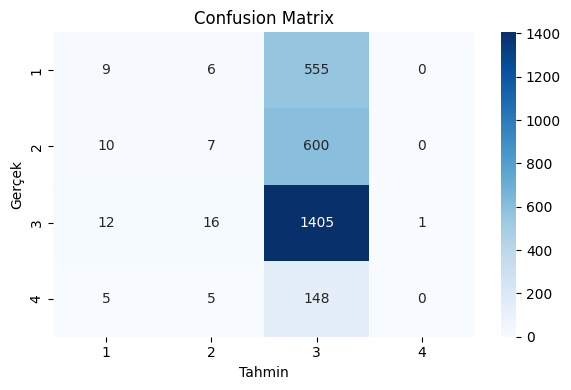

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# 📊 8. Confusion Matrix Görselleştir + Kaydet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Dosya isimlerini modele göre ayarla
model_id = MODEL_NAME.split("/")[-1].replace("-", "_")
report_filename = f"classification_report_{model_id}_7.txt"
fig_filename = f"confusion_matrix_{model_id}_7.png"

# Raporu kaydet
with open(report_filename, "w") as f:
    f.write(classification_report(y_test, y_pred))

# Görselleştir ve kaydet
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4], yticklabels=[1,2,3,4])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig(fig_filename)
plt.show()

# İndir
files.download(report_filename)
files.download(fig_filename)
